In [1]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np

In [5]:
# Specify the name that is used to seach for the data
place_name = "Manhattan, New York City, NY, USA"

# Fetch OSM street network from the location
# this will take a while because there's a lot of streets
graph = ox.graph_from_place(place_name)

In [6]:
ox.io.save_graphml(graph, 'manhattan_osmnx.graphml')

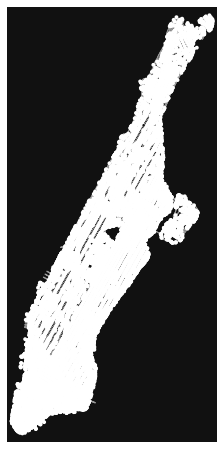

In [7]:
# Let's take a look at the graph
fig, ax = ox.plot_graph(graph)

In [8]:
graph_proj = ox.project_graph(graph, to_crs='epsg:3857')

In [9]:
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(graph_proj)
graph_nodes_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
graph_nodes_gdf

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
30807314,4.981522e+06,-8.233588e+06,4,-73.963576,40.790720,NaN,NaN,POINT (-8233587.662 4981521.805)
4332491202,4.981534e+06,-8.233599e+06,4,-73.963678,40.790805,NaN,NaN,POINT (-8233598.983 4981534.200)
2057103273,4.981326e+06,-8.233616e+06,4,-73.963831,40.789389,NaN,NaN,POINT (-8233616.004 4981325.988)
6579409036,4.981568e+06,-8.233526e+06,3,-73.963025,40.791033,NaN,NaN,POINT (-8233526.236 4981567.768)
1203806263,4.981511e+06,-8.233552e+06,3,-73.963260,40.790646,NaN,NaN,POINT (-8233552.441 4981510.866)
...,...,...,...,...,...,...,...,...
8888431292,4.969869e+06,-8.237334e+06,1,-73.997231,40.711417,NaN,NaN,POINT (-8237334.042 4969868.530)
8888431293,4.969625e+06,-8.237334e+06,1,-73.997229,40.709760,NaN,NaN,POINT (-8237333.830 4969625.086)
8888431302,4.969603e+06,-8.237470e+06,1,-73.998453,40.709613,NaN,NaN,POINT (-8237470.141 4969603.483)


In [11]:
place_footprint = ox.geocode_to_gdf(place_name)
graph_area = place_footprint.to_crs('epsg:3857')
graph_area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-8242899.037 4966850.449, -824...",40.880449,40.683941,-73.906159,-74.047222,312415317,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,0.985439


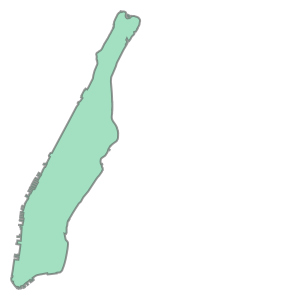

In [29]:
poly_m = graph_area.loc[0]['geometry'][3]
poly_m

In [30]:
poly_ll, poly_crs_ll = ox.projection.project_geometry(poly_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs='epsg:4326', 
                                                        to_latlong=True)

In [31]:
walkable_roads = ox.graph_from_polygon(poly_ll, 
                                       network_type='walk',
                                       clean_periphery=True)

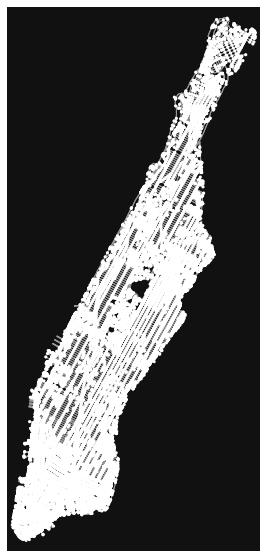

In [32]:
fig, ax = ox.plot_graph(walkable_roads, figsize=(8,10), node_size=10)

In [33]:
pizza = ox.geometries.geometries_from_polygon(poly_ll, tags={'cuisine': 'pizza'})
[fast_food]

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                
node         349323821  New York               43         10019   
             584120700       NaN                1         10016   
             663387602       NaN              500         10018   
             671071295       NaN              452         10018   
             763652153  New York              174         10010   
...                          ...              ...           ...   
way          278053570       NaN               49           NaN   
             311311054       NaN              NaN           NaN   
             319773435       NaN              102         10001   
             619560646       NaN               96         10013   
             651652780       NaN              152         10028   

                             addr:street    amenity           branch  \
element_type osmid                                                     
node         349323821  West 55th Street  fast_food          55th St   
             584120700        5th Avenue  fast_food              NaN   
             663387602        8th Avenue  fast_food              NaN   
             671071295        9th Avenue  fast_food   Port Authority   
             763652153        5th Avenue  fast_food              NaN   
...                                  ...        ...              ...   
way          278053570          Broadway  fast_food              NaN   
             311311054               NaN  fast_food              NaN   
             319773435  West 35th Street  fast_food    Herald Square   
             619560646     Walker Street  fast_food              NaN   
             651652780  East 86th Street  fast_food  Upper East Side   

                              brand brand:wikidata brand:wikipedia   cuisine  \
element_type osmid                                                             
node         349323821    Five Guys       Q1131810    en:Five Guys    burger   
             584120700          NaN            NaN             NaN       NaN   
             663387602          NaN            NaN             NaN       NaN   
             671071295          NaN            NaN             NaN     pizza   
             763652153          NaN            NaN             NaN  sandwich   
...                             ...            ...             ...       ...   
way          278053570          NaN            NaN             NaN  american   
             311311054          NaN            NaN             NaN       NaN   
             319773435          NaN            NaN             NaN   dessert   
             619560646      Popeyes       Q1330910      en:Popeyes   chicken   
             651652780  Shake Shack       Q1058722  en:Shake Shack    burger   

                        ... drink:soju  \
element_type osmid      ...              
node         349323821  ...        NaN   
             584120700  ...        NaN   
             663387602  ...        NaN   
             671071295  ...        NaN   
             763652153  ...        NaN   
...                     ...        ...   
way          278053570  ...        NaN   
             311311054  ...        NaN   
             319773435  ...        NaN   
             619560646  ...        NaN   
             651652780  ...        NaN   

                                                                    nodes  \
element_type osmid                                                          
node         349323821                                                NaN   
             584120700                                                NaN   
             663387602                                                NaN   
             671071295                                                NaN   
             763652153                                                NaN   
...                                                                   ...   
way       